In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2010-01-01'
end = pd.Timestamp.today().strftime('%Y-%m-%d') # Get data until today


df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200
2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800
2024-07-05,221.649994,226.449997,221.649994,226.339996,226.339996,60412400
2024-07-08,227.089996,227.850006,223.250000,227.820007,227.820007,59085900
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [ ]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()



,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


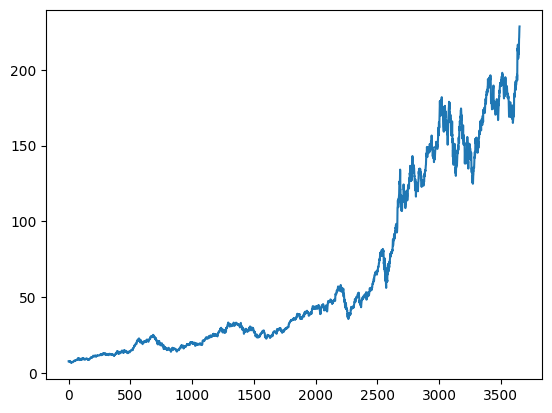

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
# ma100
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3647    184.13120
3648    184.36390
3649    184.60575
3650    184.84950
3651    185.11545
Name: Close, Length: 3652, dtype: float64

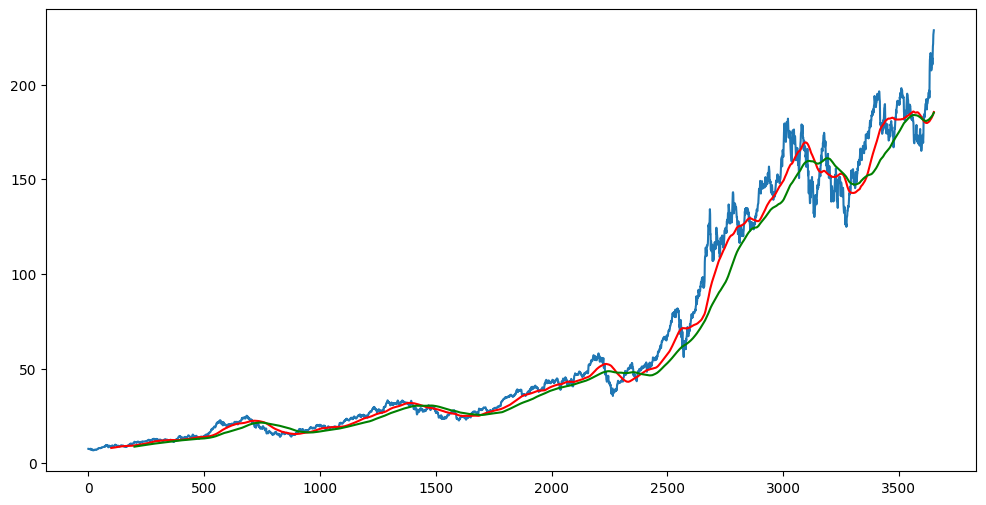

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3652, 5)

In [ ]:
training_data = pd.DataFrame(df['Close'][0: int(len(df)*0.70)]) #70% for the training Data
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))]) #Rest 30% for testing data


In [ ]:
print(training_data.shape)
print(testing_data.shape)

(2556, 1)
(1096, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
training_data_array = scaler.fit_transform(training_data)
training_data_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.88474272],
       [0.82092589],
       [0.82039213]])

In [ ]:
x_train = []
y_train = []

for i in range(100, training_data_array.shape[0]):
  x_train.append(training_data_array[i-100:i])
  y_train.append(training_data_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
77/77 [==============================] - 29s 287ms/step - loss: 0.0204
Epoch 2/50
77/77 [==============================] - 20s 259ms/step - loss: 0.0048
Epoch 3/50
77/77 [==============================] - 21s 275ms/step - loss: 0.0037
Epoch 4/50
77/77 [==============================] - 21s 271ms/step - loss: 0.0036
Epoch 5/50
77/77 [==============================] - 21s 265ms/step - loss: 0.0034
Epoch 6/50
77/77 [==============================] - 22s 281ms/step - loss: 0.0028
Epoch 7/50
77/77 [==============================] - 20s 258ms/step - loss: 0.0031
Epoch 8/50
77/77 [==============================] - 21s 279ms/step - loss: 0.0027
Epoch 9/50
77/77 [==============================] - 20s 257ms/step - loss: 0.0025
Epoch 10/50
77/77 [==============================] - 21s 278ms/step - loss: 0.0023
Epoch 11/50
77/77 [==============================] - 20s 260ms/step - loss: 0.0025
Epoch 12/50
77/77 [==============================] - 21s 280ms/step - loss: 0.0025
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
testing_data.head()

,Close
2555,68.339996
2556,74.702499
2557,72.330002
2558,75.684998
2559,73.230003


In [ ]:
past_100_days = training_data.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, testing_data], ignore_index=True)

In [ ]:
final_df.shape

(1196, 1)

In [ ]:
scaled_final_df = scaler.fit_transform(final_df)
scaled_final_df.shape

(1196, 1)

In [ ]:
scaled_final_df

array([[3.84329717e-03],
       [3.91609135e-03],
       [4.36720645e-05],
       ...,
       [9.63488644e-01],
       [9.91381631e-01],
       [1.00000000e+00]])

In [ ]:
# Now create x_test and y_test
x_test = []
y_test = []

sequence_length =100

for i in range(sequence_length, final_df.shape[0]):
  x_test.append(scaled_final_df[i-sequence_length:i])
  y_test.append(scaled_final_df[i, 0])


In [ ]:
# Convert lists to numpy arrays

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1096, 100, 1)
(1096,)


In [ ]:
y_predicted = model.predict(x_test)

35/35 [==============================] - 8s 160ms/step


In [ ]:
y_predicted.shape

(1096, 1)

In [ ]:
scaler.scale_ # This is the value by which it is scaled down

array([0.00582318])

In [ ]:
scale_factor = 1/0.00582318 # Multiply this to get the original
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

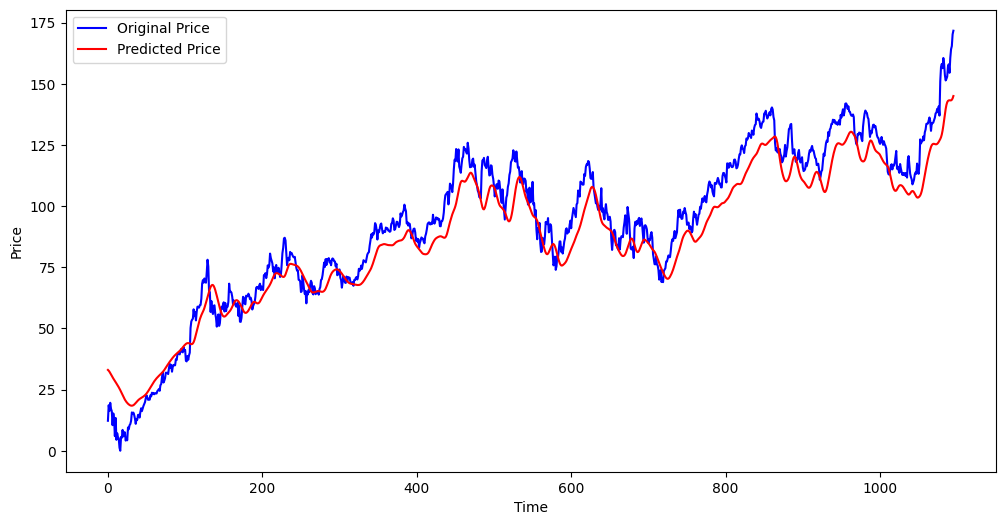

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()